In [18]:
#Варіант 4
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical

In [62]:
#Завантаження та попередня обробка датасету
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

x_train original shape (50000, 32, 32, 3)
y_train original shape (50000, 1)


In [63]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [64]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [65]:
#Створення моделі та додавання шарів
model = models.Sequential()
model.add(layers.Reshape((32*32*3,), input_shape=(32, 32, 3)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [66]:
#Компіляція моделі
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [83]:
#Інформація про модель
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 3072)              0         
                                                                 
 dense_32 (Dense)            (None, 512)               1573376   
                                                                 
 dense_33 (Dense)            (None, 256)               131328    
                                                                 
 dense_34 (Dense)            (None, 128)               32896     
                                                                 
 dense_35 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1738890 (6.63 MB)
Trainable params: 1738890 (6.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
#Навчання моделі
stats = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.8617 - accuracy: 0.3270 - val_loss: 1.6990 - val_accuracy: 0.3938
Epoch 2/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.6667 - accuracy: 0.4018 - val_loss: 1.5858 - val_accuracy: 0.4281
Epoch 3/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.5855 - accuracy: 0.4308 - val_loss: 1.5249 - val_accuracy: 0.4542
Epoch 4/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.5281 - accuracy: 0.4532 - val_loss: 1.5165 - val_accuracy: 0.4603
Epoch 5/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.4892 - accuracy: 0.4689 - val_loss: 1.4782 - val_accuracy: 0.4778
Epoch 6/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.4544 - accuracy: 0.4791 - val_loss: 1.5224 - val_accuracy: 0.4516
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.4303 - accuracy: 0.4891 - val_loss: 1.4707 -

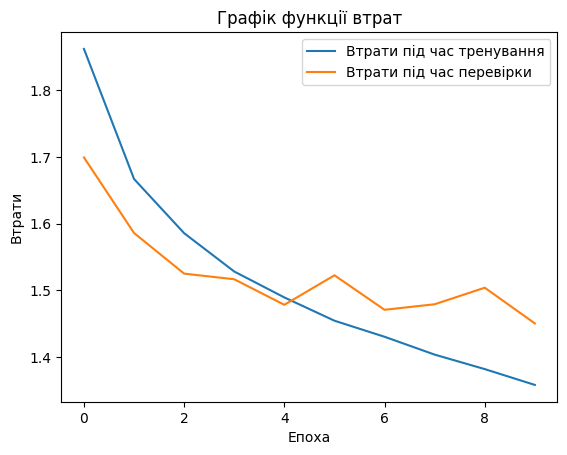

In [84]:
#Графік функції втрат
plt.plot(stats.history['loss'], label='Втрати під час тренування')
plt.plot(stats.history['val_loss'], label='Втрати під час перевірки')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.title("Графік функції втрат")
plt.legend()

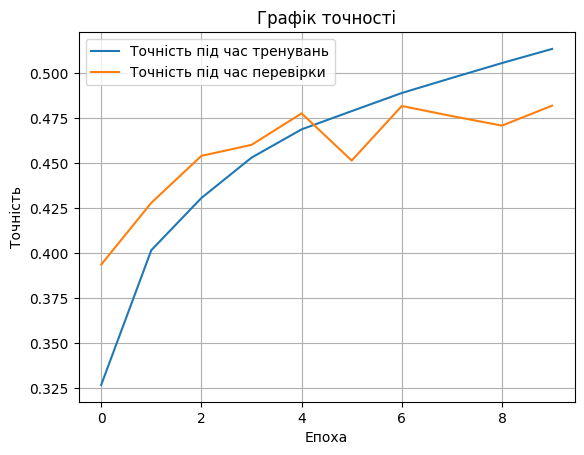

In [85]:
#Графік точності
plt.plot(stats.history['accuracy'], label='Точність під час тренувань')
plt.plot(stats.history['val_accuracy'], label='Точність під час перевірки')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.title("Графік точності")
plt.grid()
plt.legend()
plt.show()

In [71]:
#Оцінка моделі
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy: ", test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 1.4503 - accuracy: 0.4821
Test Accuracy:  0.4821000099182129


In [72]:
#Розпізнавання 10 випадкових зображень
random_indices = np.random.choice(x_test.shape[0], 10, replace=False)
random_images = x_test[random_indices]
random_labels = y_test[random_indices]

predictions = model.predict(random_images)
predicted_labels = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 61ms/step


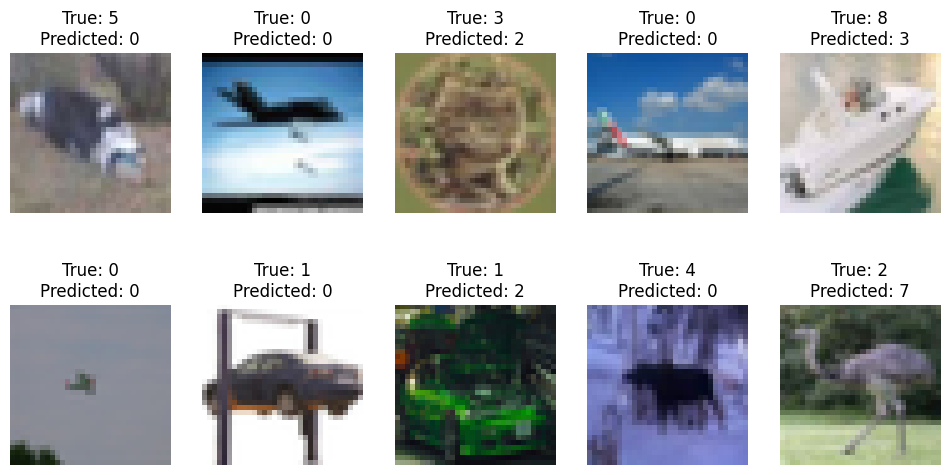

In [82]:
#Результат
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[random_indices[i]].reshape((32, 32, 3)))

    true_label = np.argmax(y_test[random_indices[i]])

    plt.title(f'True: {true_label}\nPredicted: {predicted_labels[i]}')
    plt.axis('off')

plt.show()